## Data Visualization: Vietnam weather data Dataset

### Thu thập dữ liệu

 - Ngữ cảnh sử dụng bộ dataset này
    - Nghiên cứu khí hậu: Bộ dữ liệu này cung cấp thông tin về thời tiết trong suốt hơn 12 năm tại 40 tỉnh thành Việt Nam. Điều này cho phép nhà nghiên cứu và các nhà khoa học khí hậu phân tích và hiểu sâu về các xu hướng, biến đổi và mô hình hóa khí hậu trong khu vực này. Bạn có thể tìm hiểu về mô phỏng biến đổi khí hậu, hiệu ứng của biến đổi khí hậu lên các yếu tố khác nhau như nông nghiệp, môi trường, hay nguồn nước.

    - Dự báo thời tiết: Bộ dữ liệu này có thể được sử dụng để phát triển mô hình dự báo thời tiết. Bằng cách phân tích dữ liệu lịch sử và xây dựng mô hình dự báo, bạn có thể cung cấp dự báo thời tiết cho các tỉnh thành Việt Nam trong tương lai gần hoặc xa. Điều này hữu ích cho các công ty, tổ chức hoặc cá nhân quan tâm đến dự báo thời tiết để lập kế hoạch hoạt động, điều hành hoặc tối ưu hóa các hoạt động hàng ngày.

    - Phân tích địa lý: Với bộ dữ liệu này, bạn có thể nghiên cứu tương quan giữa khí hậu và địa lý. Bạn có thể phân tích tác động của vị trí địa lý, địa hình, hoặc các yếu tố tự nhiên khác đến thời tiết của một khu vực cụ thể. Điều này có thể hữu ích trong việc đánh giá tác động của sự biến đổi khí hậu lên một khu vực địa lý cụ thể hoặc hiểu rõ hơn về các đặc điểm địa lý ảnh hưởng đến khí hậu trong khu vực.

    - Ứng dụng công nghệ: Bộ dữ liệu thời tiết cũng có thể được sử dụng để phát triển các ứng dụng công nghệ liên quan đến thời tiết, chẳng hạn như các ứng dụng di động, trang web dự báo thời tiết, hoặc hệ thống cảnh báo thời tiết. Với thông tin chi tiết về thời tiết trong quá khứ, bạn có thể cải thiện tính chính xác của các ứng dụng này và cung cấp thông tin hữu ích cho người dùng.

    - Giáo dục và tìm hiểu: Bộ dữ liệu này cung cấp một nguồn tài liệu phong phú để giáo dục và tìm hiểu về khí hậu và thời tiết của Việt Nam. Sinh viên, học sinh, hoặc những người quan tâm có thể sử dụng nó để nghiên cứu, viết bài luận, hoặc đào sâu vào lĩnh vực này.

- Chủ đề và nguồn của bộ dữ liệu này: Bộ dữ liệu về thời tiết của Việt Nam từ ngày 1 tháng 1 năm 2009 đến ngày 18 tháng 6 năm 2021 cho 40 tỉnh thành. Bộ dữ liệu này được đăng lên Kaggle bởi **VĂN VIẾT HIẾU ANH** và được chia sẻ trên Kaggle cho mục đích học tập và nghiên cứu. 
- License: **CC0: Public Domain**
- Phương pháp thu thập: Quan sát 

### Import thư viện

In [1]:
# Pandas, Numpy dùng để xử lí các table và number
import pandas as pd
import numpy as np
# Matplotlib: dùng để trực quan hóa dữ liệu
# Seaborn: dùng để trực quan hóa dữ liệu
import matplotlib.pyplot as plt
import seaborn as sns
# plotly: dùng để trực quan hóa, tuy nhiên người dùng còn có thể tương tác trực tiếp với biểu đồ
import plotly.express as px
import plotly.graph_objects as go

from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

## Đọc dữ liệu từ file csv

In [26]:
df = pd.read_csv("./weather.csv",encoding = "ISO-8859-1")

### Tiền xử lý dữ liệu 
#### In 5 dòng đầu tiên

In [4]:
df.head()

,province,max,min,wind,wind_d,rain,humidi,cloud,pressure,date
0,Bac Lieu,27,22,17,NNE,6.9,90,71,1010,2009-01-01
1,Bac Lieu,31,25,20,ENE,0.0,64,24,1010,2010-01-01
2,Bac Lieu,29,24,14,E,0.0,75,45,1008,2011-01-01
3,Bac Lieu,30,24,30,E,0.0,79,52,1012,2012-01-01
4,Bac Lieu,31,25,20,ENE,0.0,70,24,1010,2013-01-01


#### Thông tin số dòng và số cột

In [5]:
df.shape

(181960, 10)

#### Thông tin cột

In [6]:
df.columns

Index(['province', 'max', 'min', 'wind', 'wind_d', 'rain', 'humidi', 'cloud',
       'pressure', 'date'],
      dtype='object')

 - Cột `province` là các tỉnh thành
 - Cột `max` là nhiệt độ tối đa của ngày 
 - Cột `min` là nhiệt độ tối thiểu của ngày 
 - Cột `wind` là tốc độ gió (km/h) 
 - Cột `wind_d` là huống gió 
 - Cột `rain` là lượng mưa 
 - Cột `humidi` là % độ ẩm 
 - Cột `cloud` là % gió
 - Cột `pressure` là áp suất
 - Cột `date` là ngày thu thập dữ liệu

#### Kiểu dữ liệu của từng cột

In [7]:
df.dtypes

province     object
max           int64
min           int64
wind          int64
wind_d       object
rain        float64
humidi        int64
cloud         int64
pressure      int64
date         object
dtype: object

 - Dữ liệu của các cột `max`, `min`, `wind`, `humidi`, `cloud`, `pressure` là kiểu số nguyên 
 - Dữ liệu của các cột `rain` là kiểu số thực 
 - Các dữ liệu ở các cột còn lại thuộc kiểu non-numeric

#### Số giá trị null của từng cột

In [8]:
df.isnull().sum()

province    0
max         0
min         0
wind        0
wind_d      0
rain        0
humidi      0
cloud       0
pressure    0
date        0
dtype: int64

Ta thấy không có giá trị null trong dataframe

### Chuyển về kiểu dữ liệu datetime

Áp dụng cho cột `date` 

In [27]:
df["date"] = pd.to_datetime(df["date"])


Kiểu tra kiểu dữ liệu

In [10]:
df.dtypes

province            object
max                  int64
min                  int64
wind                 int64
wind_d              object
rain               float64
humidi               int64
cloud                int64
pressure             int64
date        datetime64[ns]
dtype: object

Cách trích xuất thông tin từ dữ liệu datetime

In [11]:
df['date'].dt.day

0          1
1          1
2          1
3          1
4          1
          ..
181955    28
181956    28
181957    28
181958    28
181959    28
Name: date, Length: 181960, dtype: int64

#### Kiểm tra các dòng bị trùng lặp

In [12]:
df.duplicated().sum()

0

Không có dòng nào mà dữ liệu bị lặp

In [13]:
df.head()

,province,max,min,wind,wind_d,rain,humidi,cloud,pressure,date
0,Bac Lieu,27,22,17,NNE,6.9,90,71,1010,2009-01-01
1,Bac Lieu,31,25,20,ENE,0.0,64,24,1010,2010-01-01
2,Bac Lieu,29,24,14,E,0.0,75,45,1008,2011-01-01
3,Bac Lieu,30,24,30,E,0.0,79,52,1012,2012-01-01
4,Bac Lieu,31,25,20,ENE,0.0,70,24,1010,2013-01-01


#### Kiểm tra các giá trị bị sai

In [4]:
df['province'].unique()

array(['Bac Lieu', 'Ho Chi Minh City', 'Tam Ky', 'Ben Tre', 'Hoa Binh',
       'Tan An', 'Bien Hoa', 'Hong Gai', 'Thai Nguyen', 'Buon Me Thuot',
       'Hue', 'Thanh Hoa', 'Ca Mau', 'Long Xuyen', 'Tra Vinh', 'Cam Pha',
       'My Tho', 'Tuy Hoa', 'Cam Ranh', 'Nam Dinh', 'Uong Bi', 'Can Tho',
       'Nha Trang', 'Viet Tri', 'Chau Doc', 'Phan Rang', 'Vinh', 'Da Lat',
       'Phan Thiet', 'Vinh Long', 'Ha Noi', 'Play Cu', 'Vung Tau',
       'Hai Duong', 'Qui Nhon', 'Yen Bai', 'Hai Phong', 'Rach Gia',
       'Hanoi', 'Soc Trang'], dtype=object)

In [28]:
df[df['province'] == 'Hanoi'].count()

province    4549
max         4549
min         4549
wind        4549
wind_d      4549
rain        4549
humidi      4549
cloud       4549
pressure    4549
date        4549
dtype: int64

In [29]:
df[df['province'] == 'Ha Noi'].count()

province    4549
max         4549
min         4549
wind        4549
wind_d      4549
rain        4549
humidi      4549
cloud       4549
pressure    4549
date        4549
dtype: int64

In [30]:
df[df['province'] == 'Hanoi'].reset_index() == df[df['province'] == 'Ha Noi'].reset_index()

,index,province,max,min,wind,wind_d,rain,humidi,cloud,pressure,date
0,False,False,True,True,True,True,True,True,True,True,True
1,False,False,True,True,True,True,True,True,True,True,True
2,False,False,True,True,True,True,True,True,True,True,True
3,False,False,True,True,True,True,True,True,True,True,True
4,False,False,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
4544,False,False,False,False,False,False,False,False,False,False,False
4545,False,False,False,False,True,False,False,False,False,False,False
4546,False,False,False,False,False,False,False,False,False,False,False
4547,False,False,False,False,False,True,False,False,False,False,False


In [31]:
df = df[df['province'] != 'Hanoi']

In [32]:
df[df['province'] == 'Hanoi'].count()

province    0
max         0
min         0
wind        0
wind_d      0
rain        0
humidi      0
cloud       0
pressure    0
date        0
dtype: int64

#### Mô tả dữ liệu

Tìm hiểu các cột có dữ liệu numerical

In [15]:
df.describe()

,max,min,wind,rain,humidi,cloud,pressure
count,181960.000000,181960.000000,181960.000000,181960.000000,181960.000000,181960.000000,181960.000000
mean,29.837277,23.277874,11.038657,6.567130,77.083068,41.721268,1010.229127
std,4.571345,3.945381,5.311807,13.602055,9.288553,23.875067,4.635714
min,4.000000,2.000000,1.000000,0.000000,23.000000,0.000000,988.000000
25%,28.000000,21.000000,7.000000,0.100000,71.000000,23.000000,1008.000000
50%,31.000000,24.000000,10.000000,1.800000,78.000000,38.000000,1010.000000
75%,33.000000,26.000000,14.000000,7.500000,83.000000,58.000000,1012.000000
max,46.000000,32.000000,54.000000,596.400000,100.000000,100.000000,1038.000000


 - Nhiệt độ tối đa đạt được là gần 30 độ 
 - Nhiệt độ tối thiểu đạt được là 23 độ 
 - Tốc độ gió trung bình là 11km/h 
 

Tìm hiểu các cột có dữ liệu categorical

In [16]:
cat_features = [f for f in df.columns if(df[f].dtype=='O')]
tmp = df[cat_features].describe()

tmp

,province,wind_d
count,181960,181960
unique,40,16
top,Bac Lieu,ESE
freq,4549,21526


In [17]:
print('Percent of Bac Lieu of total province: ' + str(tmp.loc['freq', 'province'] * 100 / tmp.loc['count', 'province']))
print('Percent of ESE of total total province: ' + str(tmp.loc['freq', 'wind_d'] * 100 / tmp.loc['count', 'wind_d']))


Percent of Bac Lieu of total province: 2.5
Percent of ESE of total total province: 11.830072543416135


### Khám phá mối quan hệ trong dữ liệu

**Câu hỏi 1**: Nhiệt độ trung bình của các tỉnh thành là bao nhiêu?
 
**Câu hỏi 2**: Tốc độ gió trung bình là bao nhiêu 

**Câu hỏi 3**: Huống gió phổ biến nhất là gì? 

**Câu hỏi 4**: Có sự tương quan giữa lượng mưa và độ ẩm không?

**Câu hỏi 5**: Áp suất có biến đổi theo thời gian không? 

**Câu hỏi 6**: Mối tương quan giữa tốc độ gió, lượng mưa và độ ẩm

##### Câu hỏi 1:

C:\Users\ACER\AppData\Local\Temp\ipykernel_9764\3973629247.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_temp = df.groupby('province')['max', 'min'].mean()


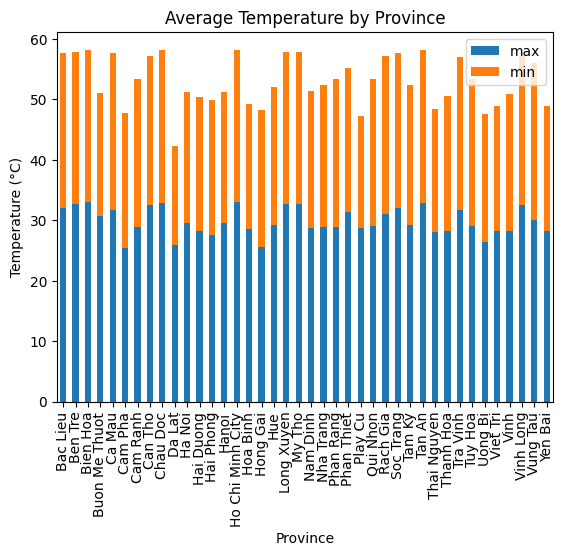

In [18]:
avg_temp = df.groupby('province')['max', 'min'].mean()
avg_temp.plot(kind='bar', stacked=True)
plt.title('Average Temperature by Province')
plt.xlabel('Province')
plt.ylabel('Temperature (°C)')
plt.show()

##### Câu hỏi 2: 

In [19]:
avg_wind = df['wind'].mean()
print('Average Wind Speed:', avg_wind)

Average Wind Speed: 11.038656847658826


##### Câu hỏi 3: 

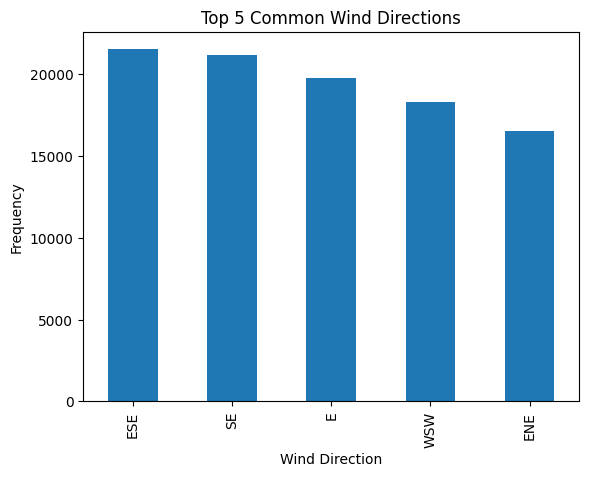

In [20]:
top_wind_d = df['wind_d'].value_counts().head(5)
top_wind_d.plot(kind='bar')
plt.title('Top 5 Common Wind Directions')
plt.xlabel('Wind Direction')
plt.ylabel('Frequency')
plt.show()

##### Câu hỏi 5:

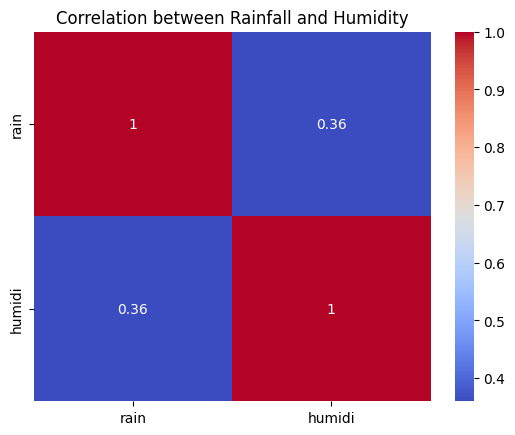

In [21]:
correlation = df[['rain', 'humidi']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Rainfall and Humidity')
plt.show()

##### Câu hỏi 5:

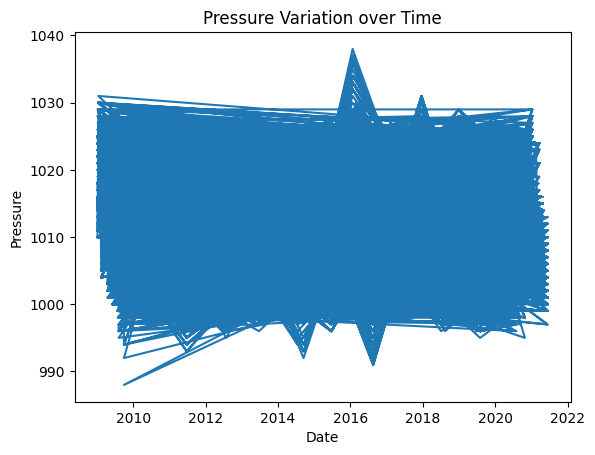

In [22]:
plt.plot(df['date'], df['pressure'])
plt.title('Pressure Variation over Time')
plt.xlabel('Date')
plt.ylabel('Pressure')
plt.show()

##### Câu hỏi 6: 

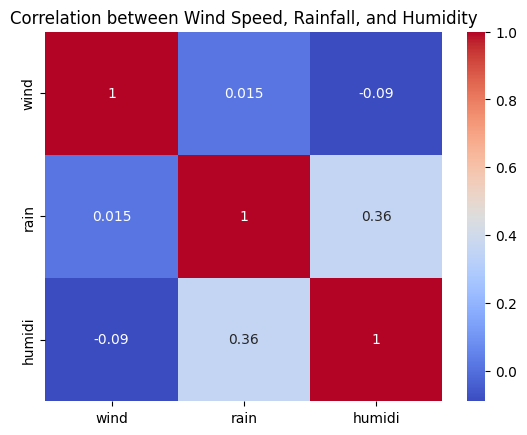

In [23]:
correlation_matrix = df[['wind', 'rain', 'humidi']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Wind Speed, Rainfall, and Humidity')
plt.show()

### Phân tích và chọn mô hình phù hợp

Thêm cột `avg_temp` vào data bằng cách lấy trung bình của cột `max` (nhiệt độ có giá trị cao nhất) và `min` (nhiệt độ có giá trị nhỏ nhất)

In [ ]:
df["avg_temp"] = (df["max"] + df["min"]) / 2
df.head()

Tính nhiệt độ trung bình của các tỉnh thành có trong dữ liệu

In [ ]:
df_grouped = df.groupby(["date"]).agg({"avg_temp": "mean"}).reset_index()

df_grouped.head(10)

Vẽ biểu đồ thể hiện nhiệt độ trung bình của khu vực xuất hiện trong dữ liệu

In [ ]:
fig = px.line(df_grouped, x="date", y="avg_temp", title='Average Temperature in Data', height=500)

fig.show()

Từ biểu đồ trên thấy được mỗi năm nhiệt độ có đương giống như một vòng cung (rounding top). Tổng thể, biểu đồ biểu diễn giống như những con sóng.

Nhìn vào biểu đồ mẫu của mô hình Prophet, thấy được một sự tương quan nhất định với biểu đồ trên khi đều xuất hiện các sóng (rounding top) nên nhóm em sẽ chọn mô hình này để dự đoán nhiệt độ

![image](picture/prophet.png)

Giới thiệu về Prophet: mô hình dự đoán cho dữ liệu time series của Facebook. Mô hình phù hợp với dữ liệu thiếu, thay đổi theo xu hướng, các trường hợp ngoại lệ

### Mô hình hóa và dự đoán

Sử dụng mô hình Facebook Prophet để dự đoán, mỗi `province` làm một model riêng

Lấy 80% dữ liệu làm tập train, 10% làm tập validate, 10% làm tập test

In [ ]:
def predict(df: pd.DataFrame, province: str):

    location_df = df[df["province"] == province]

    location_df = location_df.reset_index()[["date", "avg_temp"]].rename(
        {"date": "ds", "avg_temp": "y"}, axis=1
    )

    location_df.sort_values("ds", inplace=True)
    location_df.reset_index(drop=True, inplace=True)
    
    train_df = location_df.iloc[: int(location_df.shape[0] * 0.8)]
    test_df = location_df.iloc[int(location_df.shape[0] * 0.8) :]

    location_model = Prophet()

    location_model.fit(train_df)

    future = location_model.make_future_dataframe(periods=test_df.shape[0])

    forecast = location_model.predict(future)

    return forecast, train_df, test_df, location_model

Hàm đánh giá mô hình thông qua evaluate metrics: MSE, MAE, MAPE

In [ ]:
def model_evaluation(test_df: pd.DataFrame, forecast: pd.DataFrame):

    mse = mean_squared_error(test_df["y"], forecast["yhat"][-test_df.shape[0] :])
    mae = mean_absolute_error(test_df["y"], forecast["yhat"][-test_df.shape[0] :])
    mape = mean_absolute_percentage_error(test_df["y"], forecast["yhat"][-test_df.shape[0] :])

    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"MAPE: {mape}")

Ha Noi, Ho Chi Minh, Can Tho, Nha Trang được chọn để thử nghiệm mô hình

In [ ]:
hanoi_forecast, hanoi_train, hanoi_test, hanoi_model = predict(df, "Ha Noi")
hcm_forecast, hcm_train, hcm_test, hcm_model = predict(df, "Ho Chi Minh City")
ct_forecast, ct_train, ct_test, ct_model = predict(df, "Can Tho")
nt_forecast, nt_train, nt_test, nt_model = predict(df, "Nha Trang")

In [ ]:
print("Ha Noi")
model_evaluation(hanoi_test, hanoi_forecast)
print()

print("Ho Chi Minh City")
model_evaluation(hcm_test, hcm_forecast)
print()

print("Can Tho")
model_evaluation(ct_test, ct_forecast)
print()

print("Nha Trang")
model_evaluation(nt_test, nt_forecast)

Vẽ biểu đồ thể hiện đường dự đoán nhiệt độ của Hà Nội

In [ ]:
fig = plot_plotly(hanoi_model, hanoi_forecast)
fig.show()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=hanoi_train['ds'],
    y=hanoi_train['y'],
    mode='lines',
    name='Train data',
    line=dict(color='green')
))

fig.add_trace(go.Scatter(
    x=hanoi_test['ds'],
    y=hanoi_test['y'],
    mode='lines',
    name='Test data',
    line=dict(color='red')
))

fig.add_trace(go.Scatter(
    x=hanoi_forecast["ds"][-hanoi_test.shape[0]:],
    y=hanoi_forecast["yhat"][-hanoi_test.shape[0]:],
    mode='lines',
    name='Forecast data',
    line=dict(color='blue')
))

fig.update_layout(
    title='Temperature Forecast',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Temperature'),
)

fig.show()

### Đề xuất giải pháp

Do muốn đảm bảo độ chính xác ổn nên nhóm em thực hiện cách tạo một mô hình cho từng giá trị `province`, data chỉ có 39 tỉnh nên việc tạo 39 trained model cũng tốn khoảng thời gian không nhiều. Nhưng khi mở rộng phạm vi địa lý lên 64 tỉnh thành hoặc ra các nước khác sẽ xuất hiện nhiều nhược điểm với giải pháp này: tốn thời gian, cần hệ thống khác để quản lý các mô hình...

Giải pháp thay thế: 

- Tạo hoặc sử dụng mô hình tiên tiến hơn
- Sử dụng các kiểu file dành riêng cho thời thiết: EPW (EnergyPlus Weather Format), CLM (ESP-r weather format), WEA (Daysim weather format)